In [31]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

Podríamos orientarnos con un gráfico para la obtención de $m_0$ $b_0$

Denominamos en el código:
- X,Y : nuestros datos dados
- y : nuestra funcion de regresión

In [39]:
# para obtener nuestro gráfico orientativo con cualquiera que sean los datos
def grafico_inicial(X,Y):
    X_min = min(X) -1
    X_max = max(X)+1
    Y_min = min(Y) -1
    Y_max = max(Y)+1
    plt.axis([X_min, X_max, Y_min, Y_max])
    plt.plot(X,Y,'bo')
    return plt.show()

In [71]:
# Basandome en lo que hablamos en clase intente elaborar una función así, 
def reg_lin(X,Y,m0,b0,l,ite, crit_parada):
    b = b0
    m = m0
    n = len(X)
    Error = 0
    for i in range(ite):
        y = m*X + b
        derv_m = np.sum(2*(y - Y)*X)
        derv_b = np.sum(2*(y - Y))
        if (derv_m == 0) | (derv_b == 0) | (Error < crit_parada):
            break
        else:
            m = m - l*derv_m
            b = b - l*derv_b
            Error =  np.sum(((m*X+b)-Y)**2)
    
    return m,b,i,Error,derv_m,derv_b
# como no tenia claro que funcionara bien, le pido que me devuelva todos estos datos 
# para seguirle el rastro y ver donde se atasca

In [ ]:
def error(y,Y, b,m):
    return np.sum((y-Y)**2)

def der_b(y,Y,b,m):
    return np.sum(2*(y - Y))

def der_m(y,Y,b,m):
    return np.sum(2*(y - Y)*X)

def update(param,devparam,l):
    return param- l*devparam

In [ ]:
# Basandome en lo que hablamos en clase esta vez con las funciones auxiliares
def reg_lin2(X,Y,m0,b0,l,ite, crit_parada):
    b = b0
    m = m0
    Error = 0
    for i in range(ite):
        y = m*X + b
        derv_m = der_m(y,Y,b,m)
        derv_b = der_b(y,Y,b,m)
        if (derv_m == 0) | (derv_b == 0) | (Error < crit_parada):
            break
        else:
            m = update(m,derv_m,l)
            b = update(b,derv_b,l)
            Error = error(y,Y,b,m)
            
    
    return m,b,i,Error,derv_m,derv_b
# como no tenia claro que funcionara bien, le pido que me devuelva todos estos datos 
# para seguirle el rastro y ver donde se atasca

Usando los datos dados:

In [58]:
numberOfSamples = 30

mu, sigma = 0, 1 # mean and standard deviation
noise = np.random.normal(mu, sigma, numberOfSamples)

X = np.random.rand(numberOfSamples)*5
Y = 2*X + 1 + noise

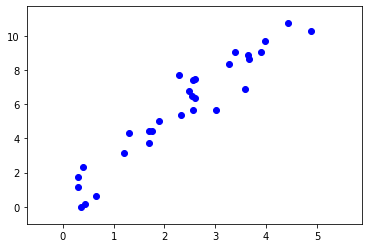

In [59]:
grafico_inicial(X,Y)

Si inicializamos con:
- $b_0$ = $\sum y_i$/n
- $m_0$ = $\sum x_i$/n

Tuve problemas dandole un valor al criterio de parada, aunque le diera un valor muy pequeño me daba algún problema. Por lo que vi que me daba buenos resultados al poner el criterio de parada en cero, lo cual le quita todo el sentido al criterio de parada, pero no encontre otra manera.

In [76]:
r = reg_lin(X,Y,stats.mean(X),stats.mean(Y),0.001,10000,0)
r

(2.2491752787874586,
 0.4961809910836854,
 9999,
 24.00748382004923,
 -1.7075230118734908e-13,
 2.7533531010703882e-14)

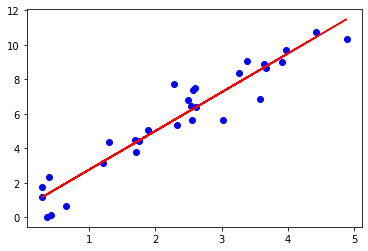

In [77]:
m = r[0]
b = r[1]
y = m*X + b 
fig, ax = plt.subplots()
ax.plot(X, y, color='r')
ax.scatter(X, Y, color='b')
plt.show()

Al compararlo con la función prefedinida con sklearn

In [55]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X.reshape(-1, 1),Y.reshape(-1, 1))
y_pred = lm.predict(X.reshape(-1,1))

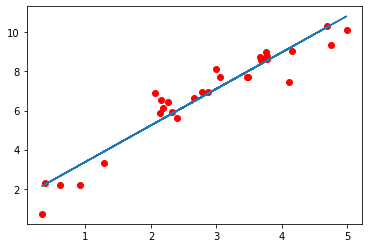

In [56]:
fig, ax = plt.subplots()
ax.plot(X, y_pred)
ax.scatter(X, Y, color='red')
plt.show()

También he ojeado este código
Que usa un doble bucle for, que supongo menos eficiente pero como mi codigo con un único bucle me daba problemas  con alguna cosa, lo he probado.

Y he observado dos cosas, si el número de iteraciones es tan alto como 100000 tarda demasiado en ejecutar, pero son realmente necesarias muchas iteraciones para que el resultado se acerque algo a lo que queremos.

https://github.com/albgarse/Artificial-Intelligence/blob/master/Machine%20Learning/Regresion%20lineal.ipynb

Primero definimos el error:

In [2]:
def error(x, y, b, m):
    n = len(x)
    Error = 0.0
    for i in range(n):
        hipotesis = b+m*x[i]
        Error +=  (y[i] - hipotesis) ** 2
    return Error / (2*n)

Luego la función que nos itera basandose en el método del gradiente descendiente:

- Le damos nombre alpha a $\lambda$

In [3]:
def descenso_gradiente(x, y, b, m, alpha, iters):
    n = len(x)
    hist_error = []
    for j in range(ite):
        b_deriv = 0
        m_deriv = 0
        for i in range(n):
            hipotesis = b+m*x[i]
            b_deriv += hipotesis - y[i]
            m_deriv += (hipotesis - y[i]) * x[i]
            hist_error.append(error(x, y, b, m))
        b -= (b_deriv / n) * alpha
        m -= (m_deriv / n) * alpha
        
    return a, b, hist_error

Generamos datos aleatorios para probar el método 

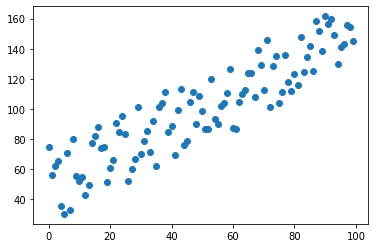

In [1]:
def gen_data(n, bias, varianza):
    x = []
    y = []
    for i in range(0, n):
        x.append(i)
        y.append((i + bias) + random.uniform(0, 1) * varianza)
    return x, y
 
x,y = gen_data(100, 25, 50)
plt.scatter(x, y)

In [26]:
b=1
m=1
alpha = 0.0001
iters = 100000
b,m, hist_error = descenso_gradiente(x, y, b, m, alpha, iters)
b,m 

(46.07923628088942, 1.0648058605672204)

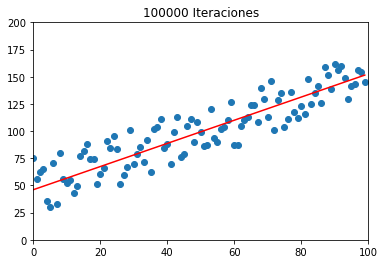

In [27]:
plt.scatter(x, y)
pred_x = [0, max(x)]
pred_y = [b+m*0, b+m*max(x)]
plt.title('100000 Iteraciones')
plt.axis([0, 100, 0, 200]) 
plt.plot(pred_x, pred_y, "r")

Esto lo usa en el código de github y me ha parecido interesante, por el tema de ver como se comporta el error.


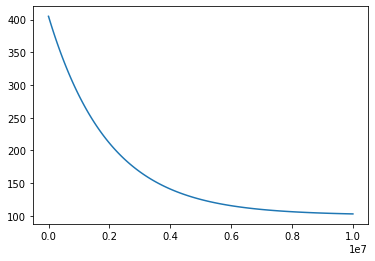

In [29]:
x_base = range(len(hist_error))
plt.plot(x_base[1000:], hist_error[1000:])

Ahora lo probaremos con los datos de ejemplo del notebook de clase:

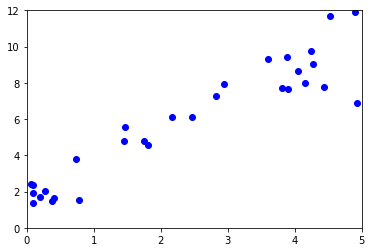

In [32]:
numberOfSamples = 30

mu, sigma = 0, 1 # mean and standard deviation
noise = np.random.normal(mu, sigma, numberOfSamples)

X = np.random.rand(numberOfSamples)*5
Y = 2*X + 1 + noise
 
plt.axis([0, 5, 0, 12])
plt.plot(X,Y,'bo')
plt.show()

In [34]:
b=1
m=1
alpha = 0.0001
iters = 50000
b,m, hist_error = descenso_gradiente(X, Y, b, m, alpha, iters)
b,m 

(1.645360541056176, 1.7679564988017806)

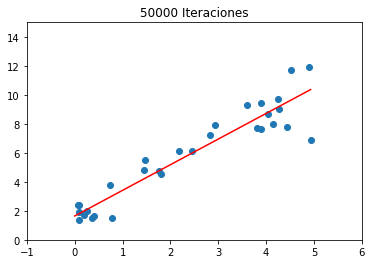

In [38]:
plt.scatter(X, Y)
pred_x = [0, max(X)]
pred_y = [b+m*0, b+m*max(X)]
plt.title('50000 Iteraciones')
plt.axis([-1, 6, 0, 15]) 
plt.plot(pred_x, pred_y, "r")